<a href="https://colab.research.google.com/github/Daniel-Martinez24/kmeans-first/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def group_assigment(data, centroids):
  # vector de zeros
  grouping_vec_c = np.zeros(len(data))
  for i in range(len(data)):
    dist = np.zeros(len(centroids))
    for j in range(len(centroids)):
      dist[j] = np.linalg.norm(data[i] - centroids[j])
    min_dist = min(dist)
    for j in range(len(centroids)):
      if min_dist == dist[j]:
        grouping_vec_c[i] = j+1
  return grouping_vec_c

In [ ]:
def update_centroid(data, grouping, centroids):
  new_centroids = [];
  for i in range(len(centroids)):
    cent = np.zeros(len(data[0]))
    count = 0
    for j in range(len(data)):
      if grouping[j] == (i + 1):
        cent = cent+data[j]
        count += 1
    group_average = cent/count
    new_centroids.append(group_average)
  return new_centroids
  

In [ ]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [ ]:
def Kmeans_alg(data, centroids):
  iteration = 0
  J_obj_vector=[]
  Stop = False
  while not Stop:
    grouping =  group_assigment(data, centroids)
    new_centroids = update_centroid(data, grouping, centroids)
    J_obj = clustering_objective(data, grouping, new_centroids)
    J_obj_vector.append(J_obj)
    iteration += 1
    if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
      Stop = True
    else:
      centroids = new_centroids
  return new_centroids, grouping, J_obj_vector, iteration

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


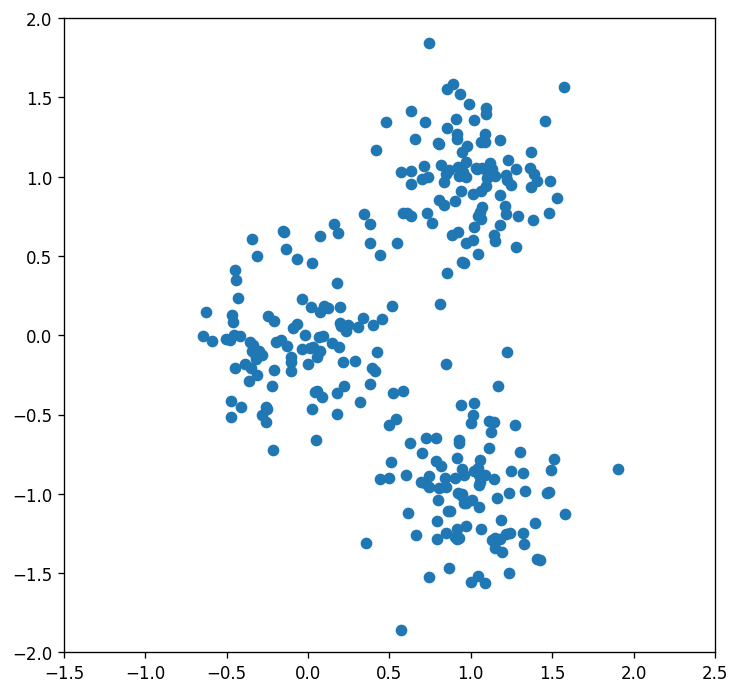

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7), dpi= 120)
X = np.concatenate([[.3 * np.random.randn(2) for i in range(100)], \
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()


In [ ]:
A =  Kmeans_alg(X, X[:3])

In [ ]:
A[0]

[array([-0.06927756, -0.04127007]),
 array([ 0.99954964, -0.97923242]),
 array([0.97370835, 0.97748763])]

In [ ]:
A

([array([-0.06927756, -0.04127007]),
  array([ 0.99954964, -0.97923242]),
  array([0.97370835, 0.97748763])],
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.

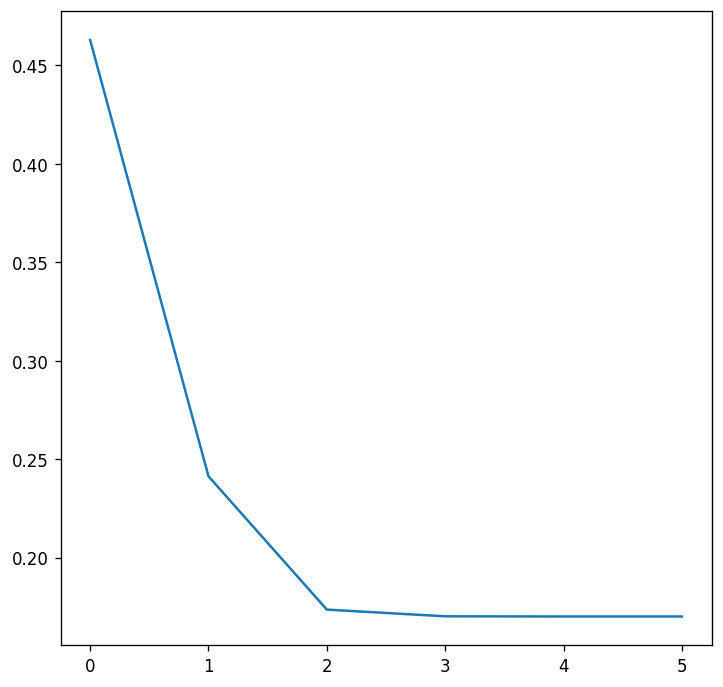

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7), dpi=120)
ax.plot(list(range(A[-1])), A[2])
plt.show()

In [ ]:
# Guardo en las listas G_1, G_2 y G_3 la posicion en la que estan los valores 1,2 o 3 de mi array A[1]
G_1 = []
G_2 = []
G_3 = []
for i in range(len(A[1])):
    if A[1][i] == 1:
        G_1.append(i)
    elif A[1][i] == 2:
        G_2.append(i)
    elif A[1][i] == 3:
        G_3.append(i)
        
# Separar los datos para poder graficarlos
X_1 = [X[:,0][G_1[i]] for i in range(len(G_1))]
Y_1 = [X[:,1][G_1[i]] for i in range(len(G_1))]

X_2 = [X[:,0][G_2[i]] for i in range(len(G_2))]
Y_2 = [X[:,1][G_2[i]] for i in range(len(G_2))]

X_3 = [X[:,0][G_3[i]] for i in range(len(G_3))]
Y_3 = [X[:,1][G_3[i]] for i in range(len(G_3))]

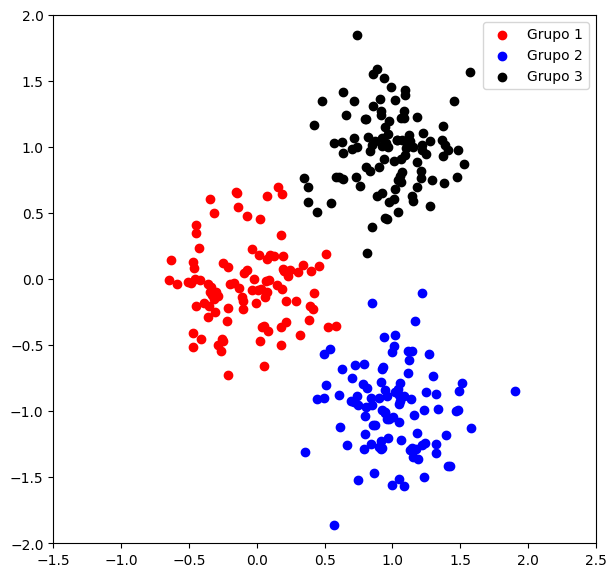

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=100)

ax.scatter( X_1, Y_1, color='red', label='Grupo 1')
ax.scatter( X_2, Y_2, color='blue', label='Grupo 2')
ax.scatter( X_3, Y_3, color='black', label='Grupo 3')
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

In [ ]:

from sklearn.datasets import fetch_openml
import random
import itertools

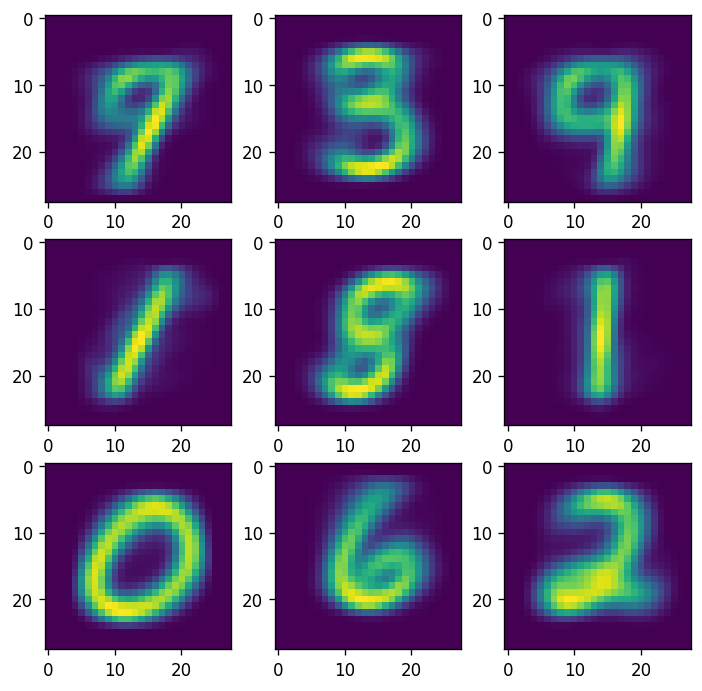

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
A = Kmeans_alg(X,random.choices(X,k=9))
a = list(itertools.product(list(range(3)),list(range(3))))

fig, ax = plt.subplots(3,3,figsize=(7,7),dpi=120)
for i,j in zip(a,A[0]):
        ax[i[0]][i[1]].imshow(j.reshape(28,28))
plt.show()